# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Mahmoud Ammash

Datum: 19.11.2023

Gruppe: 10

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

wie hoch ist die wärmekapazität von den benutzten Becher ? Kann man  newton Abkühlungsgesetz überprüfen?

wärmekapazität von den Becher berechnen und überprüfen ob newton Abkühlungsgesetz 

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung. ----Ich habe einen  sensor im kalten Becher platziert und den anderen im heißen wasser in einem Glass und dann beide gemischt  und 10 sec abgewartet, und dann strg c gerdruckt um die messsungen aufzunehmen.
<img src="figures/heatcapacity.jpg" width="800">


## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant
path= 'data/heat_capacity_data/heat_capacity_data.h5'
# DONE #



In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py as h5
with h5.File(path) as f:
    # save group1 in example.h5 to variable g.
    g = f["RawData"]
    # read group1 attribute authors.
    timestamp2 = f["RawData/1ee8625c-c3b1-6585-9d06-596340fc5960/timestamp"]
    temperature2 = f["RawData/1ee8625c-c3b1-6585-9d06-596340fc5960/temperature"]
    timestamp1 = f["RawData/1ee8626a-b673-67ff-b0bc-2dc32d8ae097/timestamp"]
    temperature1 = f["RawData/1ee8626a-b673-67ff-b0bc-2dc32d8ae097/temperature"]
    
    
    
    # read dataset2 attribute description.
    
    # read first element of dataset1 and print.
    print(timestamp1[10])
    
    timestamp_1=np.array(timestamp1)
    temperature_1=np.array(temperature1)
    timestamp_2=np.array(timestamp2)
    temperature_2=np.array(temperature2)
# DONE #

17.98959231376648


#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


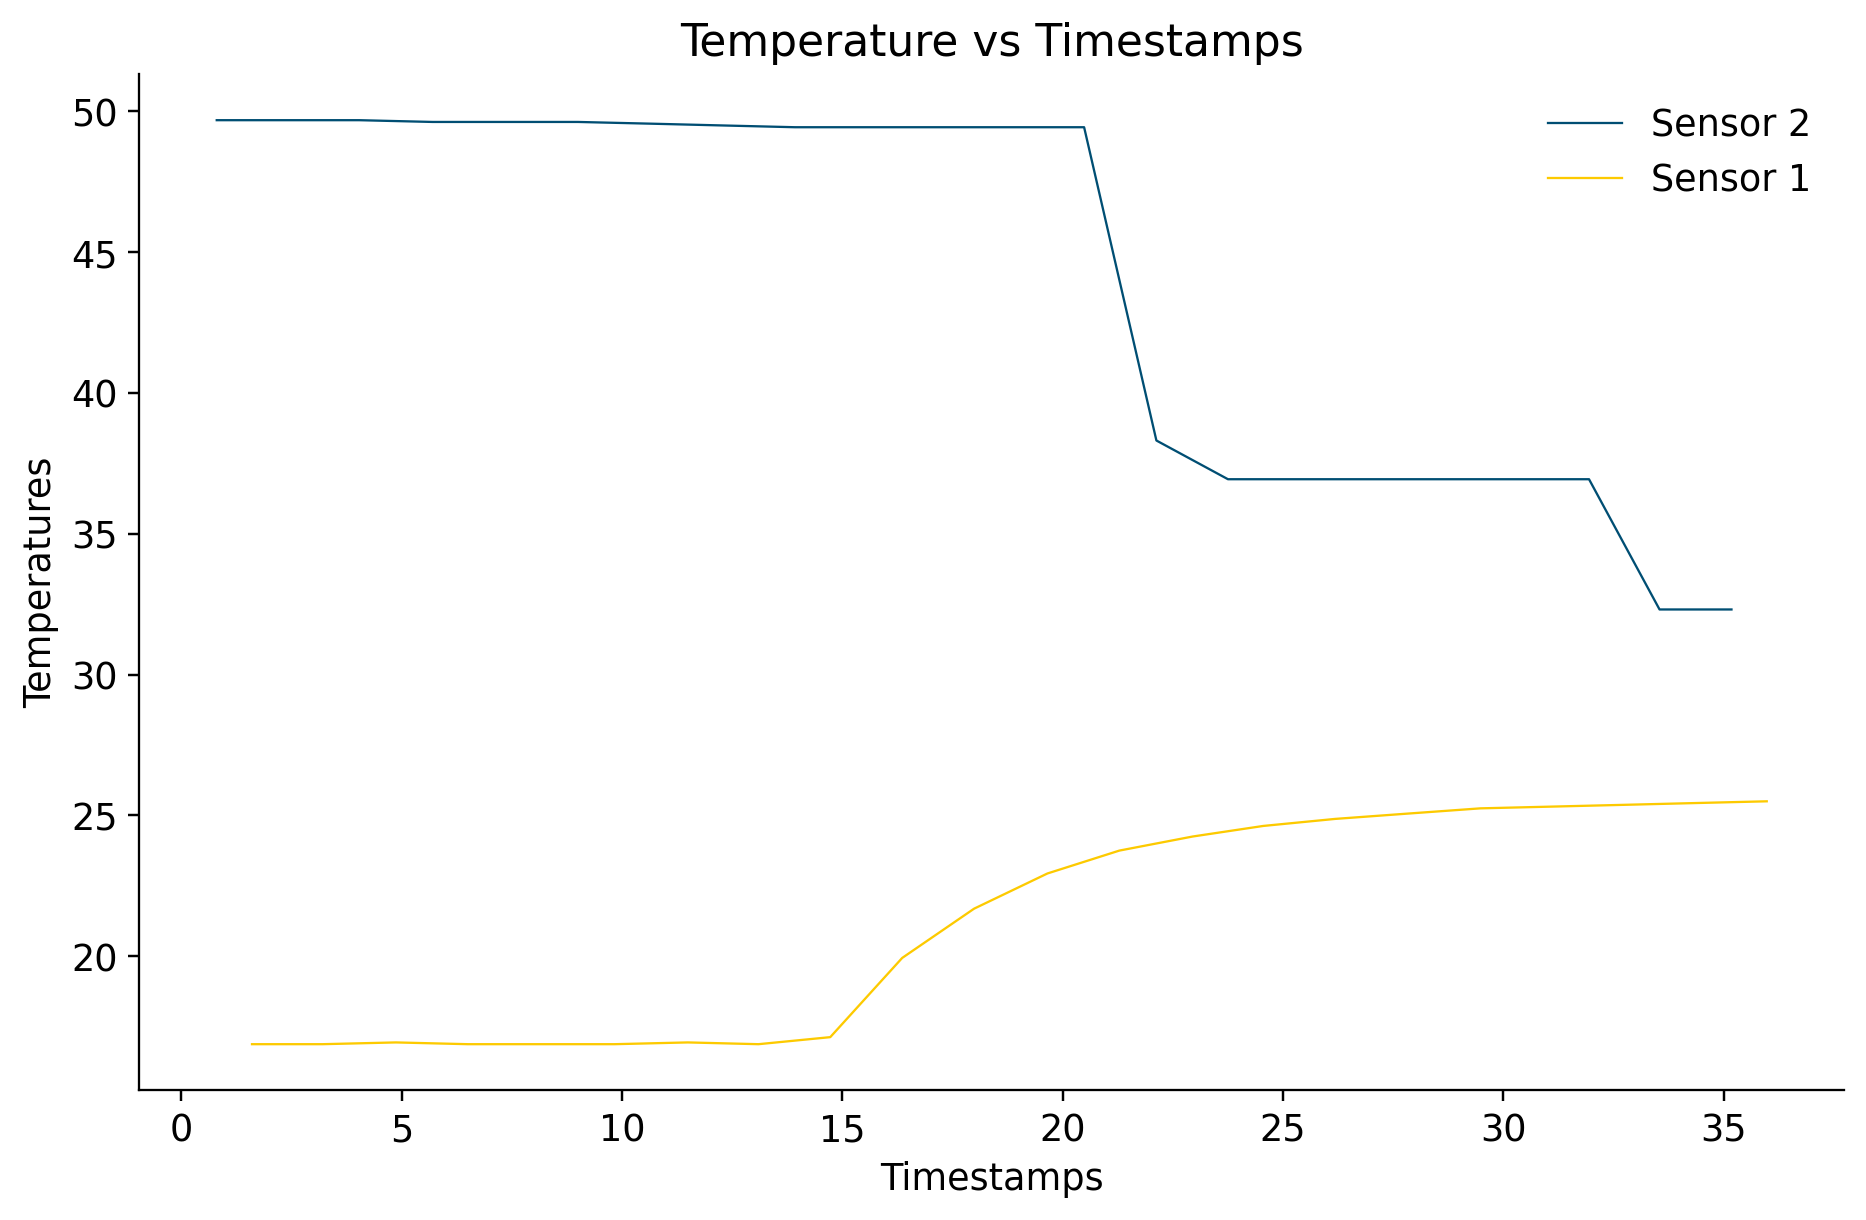

In [4]:
# TODO: Use the temperature and time data for plotting
import h5py
        # Open the HDF5 file in read mode


            # Convert timestamps to datetime objects if needed
            # timestamps = [datetime.utcfromtimestamp(ts) for ts in timestamps]

            # Plotting
plt.figure(figsize=(10, 6))
plt.plot(timestamp_2, temperature_2,label='Sensor 2')
plt.plot(timestamp_1, temperature_1,label='Sensor 1')
plt.xlabel('Timestamps')
plt.ylabel('Temperatures')
plt.title('Temperature vs Timestamps')
plt.legend()
plt.show()

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
metadata_probe= m_json.get_json_entry("/home/pi/calorimetry_home/data/heat_capacity_data", "1ee86258-ac13-6778-93da-4e29136bc734", ["probe"])
print(metadata_probe)

mass_cold_water=0.145
mass_hot_water=0.095

# DONE #

{'mass_cup': '299', 'mass_cold_water': '145', 'mass_hot_water': '95', 'units': 'grams'}


#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
T2=temperature_2[0]
T1=temperature_1[0]
TM=(temperature_1[21]+temperature_2[21])/2
print(TM)



# DONE #

28.90625


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
# TODO: Calculate heat capacity of the calorimeter
C = mass_cold_water * water_heat_capa * (T2 - TM) /(TM - T1) - mass_cold_water * water_heat_capa
# DONE #

#### (Vi) Ergebnis

In [126]:
# TODO: Print result
print(C)

# DONE #

0.44079999999999997


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Ich finde der Zahl zeigt dass mein Becher hat eien gute wärmekapazität , da alle wichtige größen wurden akkurat in die formel eingesetzt.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [ ]:
Die gefolgte strategie kann auf verschiedene bereiche verwendet werden um wichtige Werte zu finden.